In [1]:
import numpy as np
import pandas as pd
from pandas import IndexSlice as idx
import geopandas
import matplotlib.pyplot as plt

In [4]:
counties = geopandas.read_file("../data/UScounties/UScounties.shp")
counties

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,geometry
0,Lake of the Woods,Minnesota,27,077,27077,"POLYGON ((-95.34283 48.54668, -95.34105 48.715..."
1,Ferry,Washington,53,019,53019,"POLYGON ((-118.85163 47.94956, -118.84846 48.4..."
2,Stevens,Washington,53,065,53065,"POLYGON ((-117.43883 48.04412, -117.54219 48.0..."
3,Okanogan,Washington,53,047,53047,"POLYGON ((-118.97209 47.93915, -118.97406 47.9..."
4,Pend Oreille,Washington,53,051,53051,"POLYGON ((-117.43858 48.99992, -117.03205 48.9..."
...,...,...,...,...,...,...
3136,Skagway-Hoonah-Angoon,Alaska,02,232,02232,"MULTIPOLYGON (((-137.80952 58.71648, -137.4674..."
3137,Yukon-Koyukuk,Alaska,02,290,02290,"POLYGON ((-161.04770 62.20469, -160.99428 62.8..."
3138,Southeast Fairbanks,Alaska,02,240,02240,"POLYGON ((-146.96382 63.46070, -146.95735 64.2..."
3139,Denali,Alaska,02,068,02068,"POLYGON ((-152.98947 62.74900, -152.48773 63.1..."


In [5]:
emp = pd.read_csv("../data/processed/Unstable/emp.csv", header=0, index_col=[0,1])
estab = pd.read_csv("../data/processed/Unstable/estab.csv", header=0, index_col=[0,1])
wage = pd.read_csv("../data/processed/Unstable/wage.csv", header=0, index_col=[0,1])

In [6]:
wage

,,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Area Code,Area,,,,,,,,,,,,,,,,,,,,
1001,"Autauga County, Alabama",-0.955754,-0.922848,-1.063700,-1.087978,-1.167992,-1.290513,-1.398712,-1.410092,-1.451064,-1.428557,-1.505755,-1.526089,-1.583589,-1.581990,-1.580603,-1.586829,-1.553616,-1.551824,-1.524567,-1.467292
1005,"Barbour County, Alabama",0.468338,0.340737,0.214751,0.299678,0.263752,0.322802,0.315558,0.261352,0.154401,0.063194,0.091194,0.005483,-0.148420,-0.155173,-0.221025,-0.164863,-0.206091,-0.159594,-0.026287,-0.100472
1007,"Bibb County, Alabama",-1.561458,-1.774444,-1.641082,-1.572618,-1.477433,-1.510590,-1.467290,-1.357615,-1.384148,-1.437528,-1.303453,-1.300236,-1.215845,-1.123112,-1.094996,-1.253816,-1.167558,-1.220496,-1.195490,-0.895008
1017,"Chambers County, Alabama",-0.003751,0.030334,0.067972,0.048969,-0.167264,-0.256888,-0.430594,-0.575867,-1.059504,-1.201791,-1.106227,-0.982883,-0.976048,-0.946950,-0.927859,-0.953010,-0.903428,-0.825092,-0.805957,-0.753313
1021,"Chilton County, Alabama",-1.705441,-1.815621,-1.752756,-1.723509,-1.635797,-1.602991,-1.495672,-1.491028,-1.581866,-1.644171,-1.642340,-1.575753,-1.485488,-1.349559,-1.346726,-1.335569,-1.351564,-1.317702,-1.269422,-1.269846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56021,"Laramie County, Wyoming",0.406692,0.490997,0.671073,0.743687,0.732733,0.787797,0.940901,0.949856,0.986836,1.073940,0.984445,0.997150,0.974861,0.973015,0.952714,0.913831,0.858149,0.831277,0.823783,0.851365
56025,"Natrona County, Wyoming",0.991718,0.882220,0.957268,1.046574,1.218628,1.372961,1.577902,1.636837,1.730672,1.572997,1.608101,1.660413,1.670565,1.582288,1.644661,1.444370,1.075224,1.110857,1.164925,1.183381
56027,"Niobrara County, Wyoming",0.614836,0.799140,0.952720,0.860624,0.722797,0.779315,0.883834,0.951442,0.816790,1.107465,1.067277,1.101476,1.094767,1.186593,1.208757,1.015909,1.046840,1.085781,1.003678,1.016738


In [7]:
for feature in ["wage", "emp", "estab"]:
	counties[feature] = 0

wage_fips = [str(index[0]) for index in wage.index.values]
emp_fips = [str(index[0]) for index in emp.index.values]
estab_fips = [str(index[0]) for index in estab.index.values]

for fip in wage_fips:
	counties.loc[counties["FIPS"]==fip,"wage"] = 1

for fip in emp_fips:
	counties.loc[counties["FIPS"]==fip,"emp"] = 1

for fip in estab_fips:
	counties.loc[counties["FIPS"]==fip,"estab"] = 1

counties["union"] = counties["wage"] | counties["estab"] | counties["emp"]
counties["intersection"] = counties["wage"] & counties["estab"] & counties["emp"]

counties

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,geometry,wage,emp,estab,union,intersection
0,Lake of the Woods,Minnesota,27,077,27077,"POLYGON ((-95.34283 48.54668, -95.34105 48.715...",0,0,0,0,0
1,Ferry,Washington,53,019,53019,"POLYGON ((-118.85163 47.94956, -118.84846 48.4...",0,0,0,0,0
2,Stevens,Washington,53,065,53065,"POLYGON ((-117.43883 48.04412, -117.54219 48.0...",0,0,1,1,0
3,Okanogan,Washington,53,047,53047,"POLYGON ((-118.97209 47.93915, -118.97406 47.9...",0,0,1,1,0
4,Pend Oreille,Washington,53,051,53051,"POLYGON ((-117.43858 48.99992, -117.03205 48.9...",0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3136,Skagway-Hoonah-Angoon,Alaska,02,232,02232,"MULTIPOLYGON (((-137.80952 58.71648, -137.4674...",0,0,0,0,0
3137,Yukon-Koyukuk,Alaska,02,290,02290,"POLYGON ((-161.04770 62.20469, -160.99428 62.8...",0,0,0,0,0
3138,Southeast Fairbanks,Alaska,02,240,02240,"POLYGON ((-146.96382 63.46070, -146.95735 64.2...",0,0,0,0,0
3139,Denali,Alaska,02,068,02068,"POLYGON ((-152.98947 62.74900, -152.48773 63.1...",0,0,0,0,0


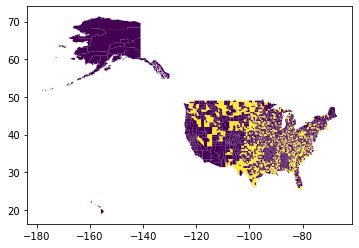

In [8]:
wage_ax = counties.plot(column="wage")

In [9]:
contig_counties = counties[(counties.STATE_NAME != "Alaska") & (counties.STATE_NAME != "Hawaii") & (counties.STATE_NAME != "Puerto Rico")]
contig_counties

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,geometry,wage,emp,estab,union,intersection
0,Lake of the Woods,Minnesota,27,077,27077,"POLYGON ((-95.34283 48.54668, -95.34105 48.715...",0,0,0,0,0
1,Ferry,Washington,53,019,53019,"POLYGON ((-118.85163 47.94956, -118.84846 48.4...",0,0,0,0,0
2,Stevens,Washington,53,065,53065,"POLYGON ((-117.43883 48.04412, -117.54219 48.0...",0,0,1,1,0
3,Okanogan,Washington,53,047,53047,"POLYGON ((-118.97209 47.93915, -118.97406 47.9...",0,0,1,1,0
4,Pend Oreille,Washington,53,051,53051,"POLYGON ((-117.43858 48.99992, -117.03205 48.9...",0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3104,LaGrange,Indiana,18,087,18087,"POLYGON ((-85.66327 41.53557, -85.65946 41.762...",0,0,0,0,0
3105,Steuben,Indiana,18,151,18151,"POLYGON ((-84.79137 41.53049, -85.19715 41.537...",1,1,1,1,1
3132,Pittsylvania,Virginia,51,143,51143,"POLYGON ((-79.71720 36.54803, -79.64135 36.846...",1,1,1,1,1
3133,Danville,Virginia,51,590,51590,"POLYGON ((-79.51977 36.59777, -79.50138 36.621...",0,0,0,0,0


Text(0.5, 1.0, 'Wage')

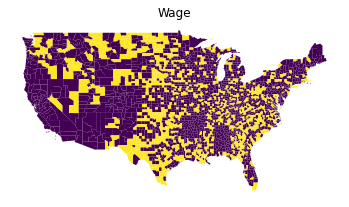

In [10]:
wage_ax = contig_counties.plot(column="wage")
wage_ax.axis("off")
wage_ax.set_title("Wage")

Text(0.5, 1.0, 'Employment')

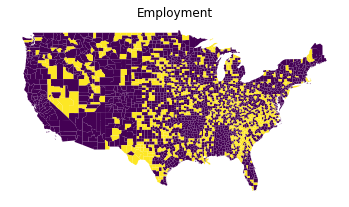

In [11]:
emp_ax = contig_counties.plot(column="emp")
emp_ax.axis("off")
emp_ax.set_title("Employment")

Text(0.5, 1.0, 'Establishments')

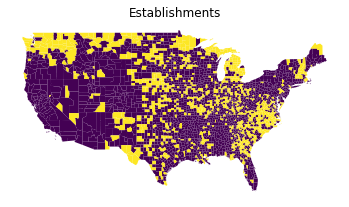

In [12]:
estab_ax = contig_counties.plot(column="estab")
estab_ax.axis("off")
estab_ax.set_title("Establishments")

Text(0.5, 1.0, 'Union')

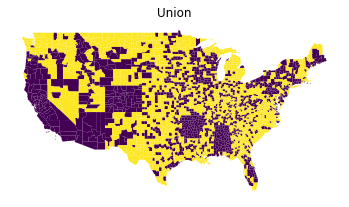

In [13]:
union_ax = contig_counties.plot(column="union")
union_ax.axis("off")
union_ax.set_title("Union")

Text(0.5, 1.0, 'Intersection')

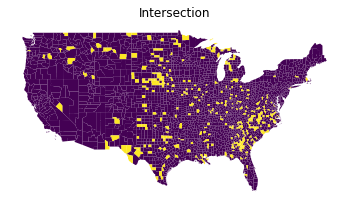

In [14]:
intersection_ax = contig_counties.plot(column="intersection")
intersection_ax.axis("off")
intersection_ax.set_title("Intersection")

In [15]:
contig_counties["union"].sum()

1809

In [16]:
contig_counties.shape[0]

3109

In [17]:
states = contig_counties["STATE_NAME"].unique()
stable = [state for state in states if contig_counties[contig_counties["STATE_NAME"]==state]["union"].sum()==0]
stable

['Connecticut',
 'California',
 'Colorado',
 'Delaware',
 'District of Columbia',
 'Arizona',
 'Arkansas',
 'Alabama']

In [18]:
contig_counties["ratio"] = 0
for state in states:
	contig_counties.loc[contig_counties["STATE_NAME"]==state, "ratio"] = contig_counties[contig_counties["STATE_NAME"]==state]["union"].sum()/contig_counties[contig_counties["STATE_NAME"]==state].shape[0]

c:\Users\Michael\anaconda3\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
C:\Users\Michael\AppData\Local\Temp/ipykernel_6084/3407184463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contig_counties.loc[contig_counties["STATE_NAME"]==state, "ratio"] = contig_counties[contig_counties["STATE_NAME"]==state]["union"].sum()/contig_counties[contig_counties["STATE_NAME"]==state].shape[0]


<AxesSubplot:>

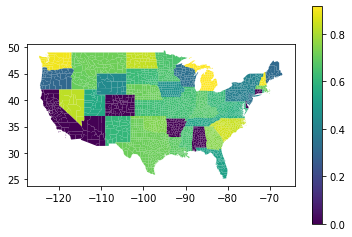

In [19]:
fig, ax = plt.subplots(1,1)
contig_counties.plot(column="ratio", ax=ax, legend=True)

In [20]:
contig_counties

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,geometry,wage,emp,estab,union,intersection,ratio
0,Lake of the Woods,Minnesota,27,077,27077,"POLYGON ((-95.34283 48.54668, -95.34105 48.715...",0,0,0,0,0,0.655172
1,Ferry,Washington,53,019,53019,"POLYGON ((-118.85163 47.94956, -118.84846 48.4...",0,0,0,0,0,0.897436
2,Stevens,Washington,53,065,53065,"POLYGON ((-117.43883 48.04412, -117.54219 48.0...",0,0,1,1,0,0.897436
3,Okanogan,Washington,53,047,53047,"POLYGON ((-118.97209 47.93915, -118.97406 47.9...",0,0,1,1,0,0.897436
4,Pend Oreille,Washington,53,051,53051,"POLYGON ((-117.43858 48.99992, -117.03205 48.9...",0,0,1,1,0,0.897436
...,...,...,...,...,...,...,...,...,...,...,...,...
3104,LaGrange,Indiana,18,087,18087,"POLYGON ((-85.66327 41.53557, -85.65946 41.762...",0,0,0,0,0,0.673913
3105,Steuben,Indiana,18,151,18151,"POLYGON ((-84.79137 41.53049, -85.19715 41.537...",1,1,1,1,1,0.673913
3132,Pittsylvania,Virginia,51,143,51143,"POLYGON ((-79.71720 36.54803, -79.64135 36.846...",1,1,1,1,1,0.582090
3133,Danville,Virginia,51,590,51590,"POLYGON ((-79.51977 36.59777, -79.50138 36.621...",0,0,0,0,0,0.582090
